# Pothole Segmentation Inference
This notebook allows you to upload an image and segment potholes using the trained YOLOv8 model.


In [1]:
# Install required packages (if needed)
# !pip install ultralytics ipywidgets

import warnings 
warnings.filterwarnings('ignore')

# Import necessary libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from ultralytics import YOLO
from IPython.display import display
import ipywidgets as widgets
from io import BytesIO

print("Libraries imported successfully!")


Libraries imported successfully!


In [2]:
# Load the trained model
# Check multiple possible locations for the model
model_paths = [
    'runs/segment/train/weights/best.pt',  # Training output directory
    'best.pt',  # Root directory
]

model_path = None
for path in model_paths:
    if os.path.exists(path):
        model_path = path
        break

if model_path is None:
    raise FileNotFoundError(
        f"Model file not found. Please ensure 'best.pt' exists in one of these locations:\n"
        f"  - {model_paths[0]}\n"
        f"  - {model_paths[1]}"
    )

print(f"Loading model from: {model_path}")
model = YOLO(model_path)
print("Model loaded successfully! ✓")


Loading model from: best.pt
Model loaded successfully! ✓


In [3]:
# Function to perform segmentation and display results
def segment_pothole(image_path_or_array, confidence=0.25):
    """
    Perform pothole segmentation on an image
    
    Args:
        image_path_or_array: Path to image file or numpy array
        confidence: Confidence threshold for detections (default: 0.25)
    """
    # Run inference
    results = model.predict(image_path_or_array, conf=confidence, save=False)
    
    # Get the first result (single image)
    result = results[0]
    
    # Create figure with two subplots: original and segmented
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    # Load original image
    if isinstance(image_path_or_array, str):
        original_img = cv2.imread(image_path_or_array)
        original_img = cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB)
    else:
        original_img = image_path_or_array
    
    # Display original image
    axes[0].imshow(original_img)
    axes[0].set_title('Original Image', fontsize=14, fontweight='bold')
    axes[0].axis('off')
    
    # Display segmented image with predictions
    annotated_img = result.plot()
    axes[1].imshow(annotated_img)
    axes[1].set_title('Pothole Segmentation Result', fontsize=14, fontweight='bold')
    axes[1].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Print detection summary
    num_detections = len(result.boxes) if result.boxes is not None else 0
    print(f"\n{'='*50}")
    print(f"Detection Summary:")
    print(f"{'='*50}")
    print(f"Number of potholes detected: {num_detections}")
    
    if num_detections > 0:
        print(f"\nDetections:")
        for i, box in enumerate(result.boxes, 1):
            conf = box.conf.item()
            print(f"  Pothole {i}: Confidence = {conf:.2%}")
    else:
        print("No potholes detected in this image.")
    
    return result


## Method 1: Upload Image Using File Upload Widget
Use the widget below to upload an image file directly.


In [4]:
# Create file upload widget
upload_widget = widgets.FileUpload(
    accept='.jpg,.jpeg,.png,.bmp,.JPG,.JPEG,.PNG,.BMP',  # Accepted file types
    multiple=False,
    description='Upload Image'
)

confidence_slider = widgets.FloatSlider(
    value=0.25,
    min=0.1,
    max=1.0,
    step=0.05,
    description='Confidence:',
    style={'description_width': 'initial'}
)

def on_upload_change(change):
    """Handle file upload"""
    if upload_widget.value:
        try:
            # Get uploaded file
            uploaded_file = list(upload_widget.value.values())[0]
            
            # Save to temporary file
            temp_path = 'temp_uploaded_image.jpg'
            with open(temp_path, 'wb') as f:
                f.write(uploaded_file['content'])
            
            # Perform segmentation with selected confidence
            segment_pothole(temp_path, confidence=confidence_slider.value)
            
            # Clean up
            if os.path.exists(temp_path):
                os.remove(temp_path)
        except Exception as e:
            print(f"Error processing image: {e}")

upload_widget.observe(on_upload_change, names='value')

print("Upload an image file below:")
display(confidence_slider)
display(upload_widget)


Upload an image file below:


FloatSlider(value=0.25, description='Confidence:', max=1.0, min=0.1, step=0.05, style=SliderStyle(description_…

FileUpload(value=(), accept='.jpg,.jpeg,.png,.bmp,.JPG,.JPEG,.PNG,.BMP', description='Upload Image')

## Method 2: Load Image from File Path
Alternatively, you can specify the path to an image file directly.



image 1/1 c:\Users\manso\Downloads\pothole\pothole\Potholes-resized-for-blog.jpg: 448x640 9 Potholes, 330.9ms
Speed: 4.7ms preprocess, 330.9ms inference, 24.5ms postprocess per image at shape (1, 3, 448, 640)


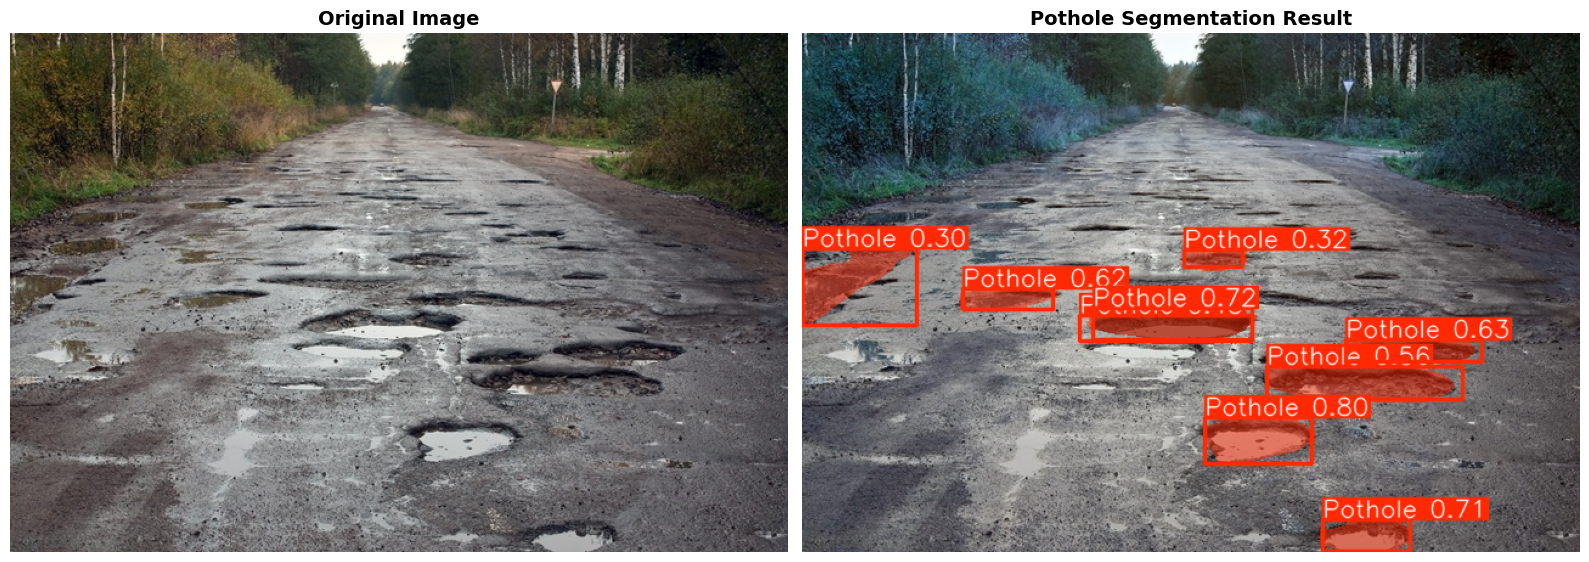


Detection Summary:
Number of potholes detected: 9

Detections:
  Pothole 1: Confidence = 79.73%
  Pothole 2: Confidence = 71.75%
  Pothole 3: Confidence = 71.41%
  Pothole 4: Confidence = 62.53%
  Pothole 5: Confidence = 61.51%
  Pothole 6: Confidence = 56.14%
  Pothole 7: Confidence = 43.45%
  Pothole 8: Confidence = 31.68%
  Pothole 9: Confidence = 30.46%


In [5]:
# Specify the path to your image file
image_path = 'Potholes-resized-for-blog.jpg'  # Change this to your image path

# Perform segmentation
if os.path.exists(image_path):
    segment_pothole(image_path, confidence=0.25)
else:
    print(f"Image not found at: {image_path}")
    print("Please update the 'image_path' variable with a valid image path.")


## Method 3: Test with Validation Images
You can also test the model on images from the validation set.


Testing on: pic-175-_jpg.rf.9fc746d4865c11f38047cf383baa30a6.jpg

image 1/1 c:\Users\manso\Downloads\pothole\pothole\Pothole_Segmentation_YOLOv8\valid\images\pic-175-_jpg.rf.9fc746d4865c11f38047cf383baa30a6.jpg: 640x640 2 Potholes, 394.7ms
Speed: 53.6ms preprocess, 394.7ms inference, 7.4ms postprocess per image at shape (1, 3, 640, 640)


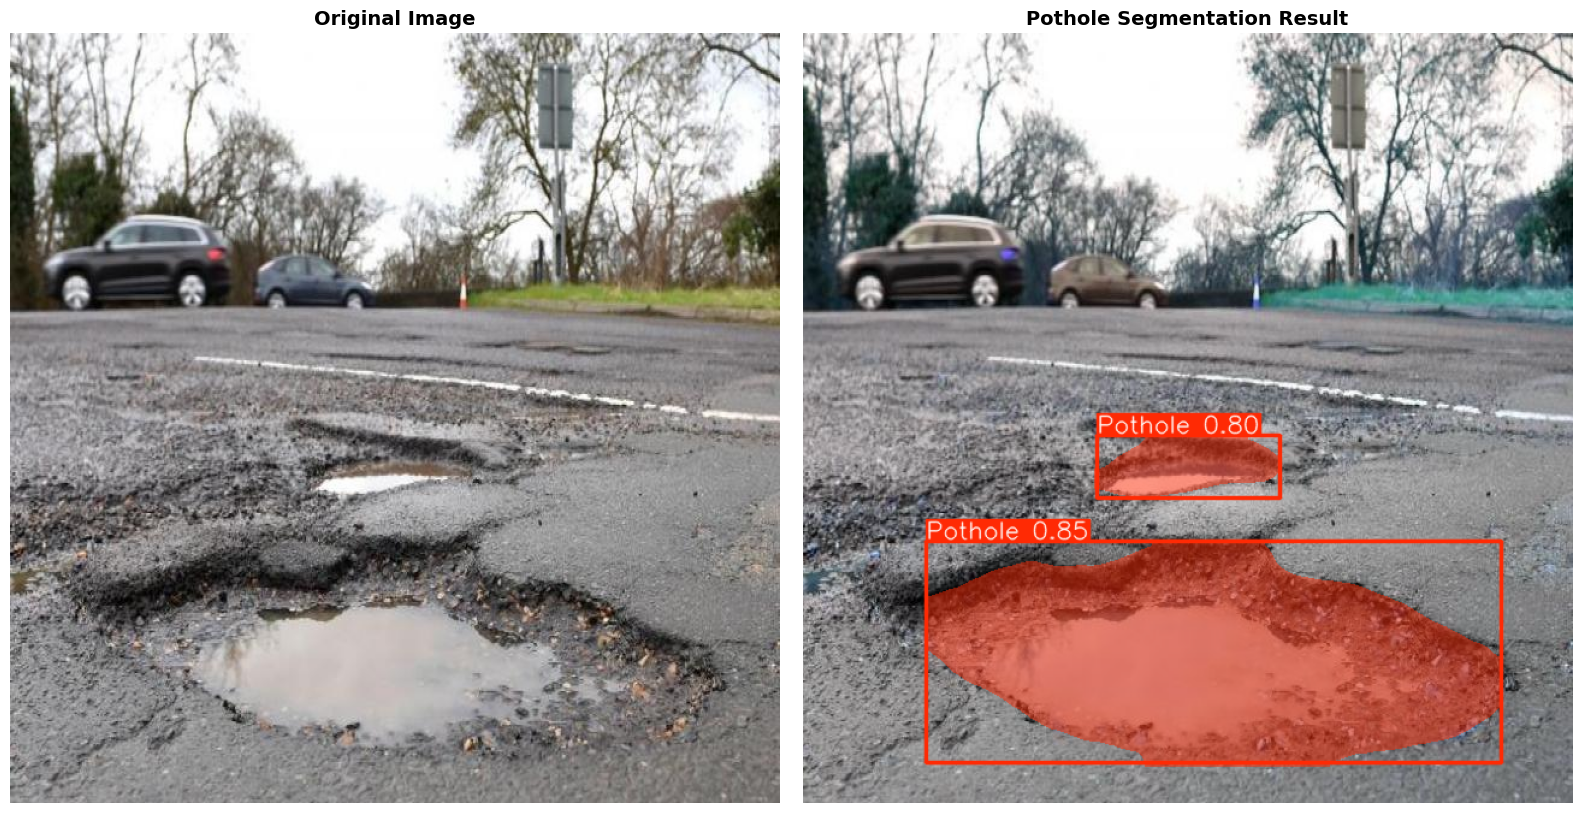


Detection Summary:
Number of potholes detected: 2

Detections:
  Pothole 1: Confidence = 85.30%
  Pothole 2: Confidence = 80.35%


In [10]:
# Test on validation images
valid_images_dir = 'Pothole_Segmentation_YOLOv8/valid/images'

if os.path.exists(valid_images_dir):
    import random
    
    # Get a random validation image
    valid_images = [f for f in os.listdir(valid_images_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    if valid_images:
        random_image = random.choice(valid_images)
        image_path = os.path.join(valid_images_dir, random_image)
        
        print(f"Testing on: {random_image}")
        segment_pothole(image_path, confidence=0.25)
    else:
        print("No validation images found.")
else:
    print(f"Validation images directory not found: {valid_images_dir}")


## Method 4: Beautiful Web UI with Streamlit
Launch an interactive web interface for easy image upload and visualization.

**To run the Streamlit app:**
1. Install Streamlit: `pip install streamlit`
2. Run: `streamlit run pothole_streamlit.py`
3. The app will open in your browser automatically


In [7]:
# Streamlit Web UI
# To run: streamlit run pothole_streamlit.py
# Or use the standalone script: python3 pothole_streamlit.py

print("""
To launch the Streamlit web interface:

1. Install Streamlit:
   pip3 install streamlit

2. Run the app:
   streamlit run pothole_streamlit.py

3. The app will open automatically in your browser at http://localhost:8501

The Streamlit app provides:
- Easy image upload
- Real-time pothole detection
- Side-by-side comparison view
- Detection summary with confidence scores
- Adjustable confidence threshold
""")



To launch the Streamlit web interface:

1. Install Streamlit:
   pip3 install streamlit

2. Run the app:
   streamlit run pothole_streamlit.py

3. The app will open automatically in your browser at http://localhost:8501

The Streamlit app provides:
- Easy image upload
- Real-time pothole detection
- Side-by-side comparison view
- Detection summary with confidence scores
- Adjustable confidence threshold

